In [24]:
import re
from pathlib import Path
from typing import Iterable, Tuple

import numpy as np

from paraphone.tasks.filters.ngrams import NgramScoresCSV
from paraphone.tasks.filters.base import CandidatesPairCSV
ngram_scores_csv = NgramScoresCSV(Path("../workspaces/large_fr/candidates_filtering/ngram/scores.csv"))
candidates_csv = CandidatesPairCSV(Path("../workspaces/large_fr/candidates_filtering/steps/step_5_levenshtein.csv"))

In [23]:
all_scores = {
    phonetic: (unigram_bounded, bigram_bounded)
    for phonetic, _, unigram_bounded, _, bigram_bounded
    in ngram_scores_csv
}

In [25]:
pairs = [(word_pho, non_word_pho) for _, word_pho, non_word_pho in candidates_csv]


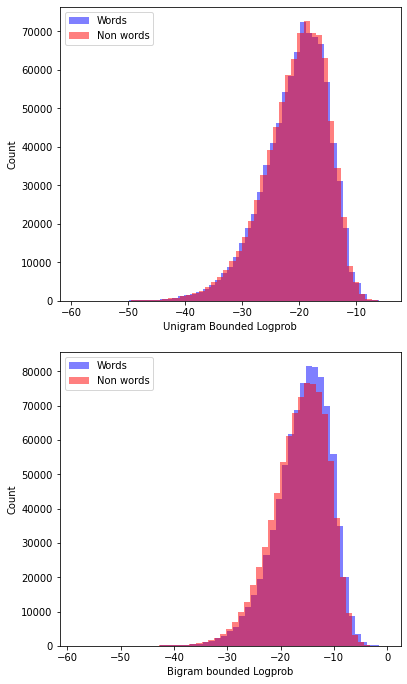

In [32]:
import matplotlib.pyplot as plt
bins = 50
fig, axs = plt.subplots(2, 1)
fig.set_figheight(10)
fig.tight_layout(pad=3.0)


for i, (ngram_type, ax) in enumerate(zip(["Unigram Bounded", "Bigram bounded"], axs)):
    words = [all_scores[pho][i] for pho, _ in pairs]
    nonwords = [all_scores[pho][i] for _, pho in pairs]

    ax.hist(np.ma.masked_invalid(words),
                          color="blue",
                          alpha=0.5,
                          bins=bins,
                          label="Words")
    ax.hist(np.ma.masked_invalid(nonwords),
                         color="red",
                         alpha=0.5,
                         bins=bins,
                         label="Non words")
    ax.legend(loc='upper left')
    ax.set_xlabel(f"{ngram_type} Logprob")
    ax.set_ylabel("Count")
fig.savefig("ngram_probs_histogram.png")